In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

from rfpop import PiecewiseQuadratic, BiWeight, rfpop, get_breakpoints

### PiecewiseQuadratic and BiWeight tests

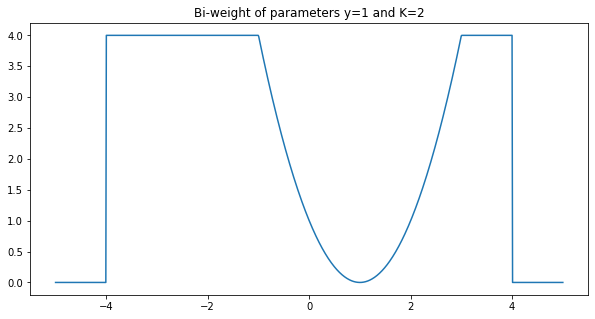

In [4]:
bi_weight = BiWeight(1, 2, -4, 4)
t = np.linspace(-5, 5, 1000)
y = np.array([bi_weight(x) for x in t])
plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.title("Bi-weight of parameters y=1 and K=2")
plt.show()

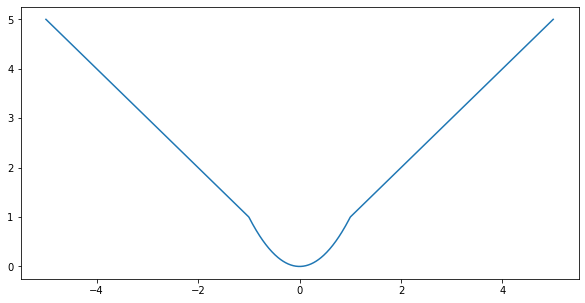

In [5]:
polynom = PiecewiseQuadratic([(-10,-1),(-1,1),(1,10)], [[-1,0],[1,0,0],[1,0]])
t = np.linspace(-5, 5, 1000)
y = np.array([polynom(x) for x in t])
plt.figure(figsize=(10, 5))
plt.plot(t, y)

### Changepoint detection tests

  0%|          | 0/24 [00:00<?, ?it/s]

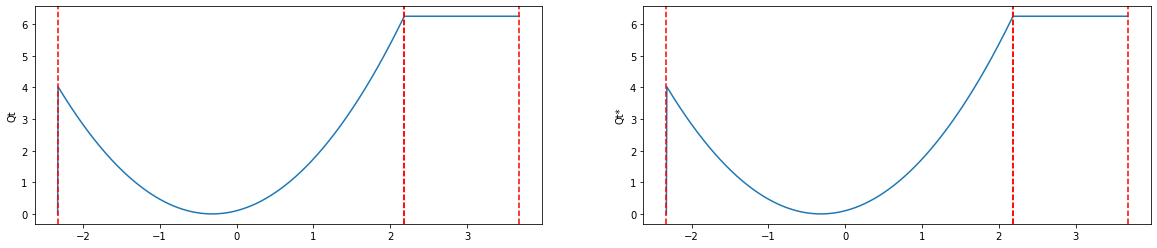

  4%|▍         | 1/24 [00:00<00:05,  4.06it/s]

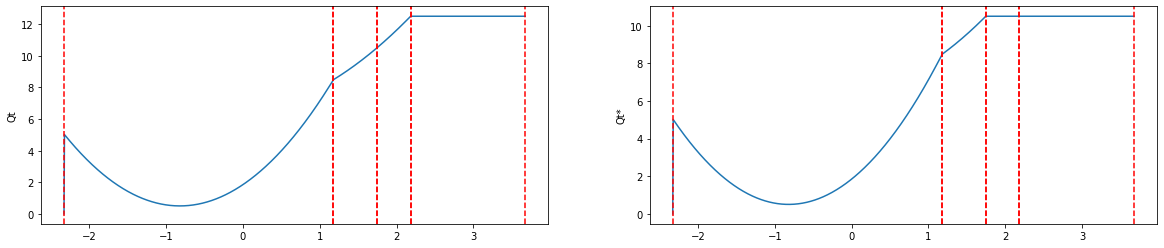

  8%|▊         | 2/24 [00:00<00:05,  4.04it/s]

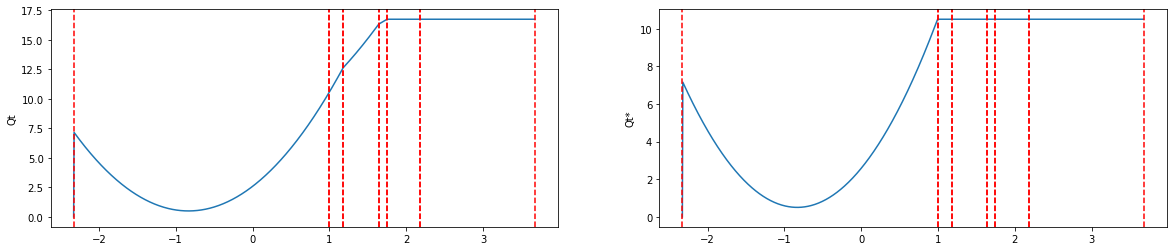

 12%|█▎        | 3/24 [00:00<00:04,  4.39it/s]

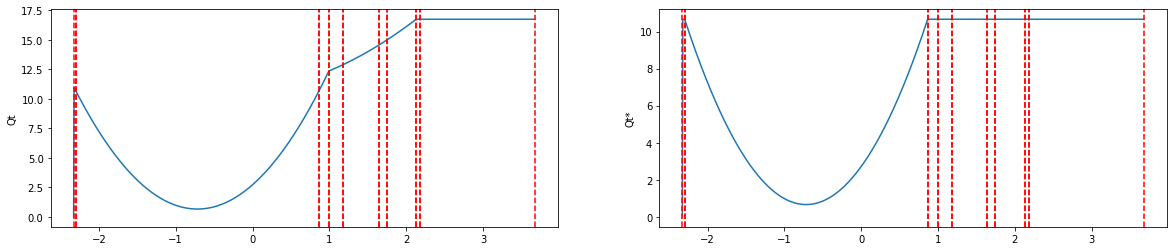

 17%|█▋        | 4/24 [00:00<00:04,  4.31it/s]

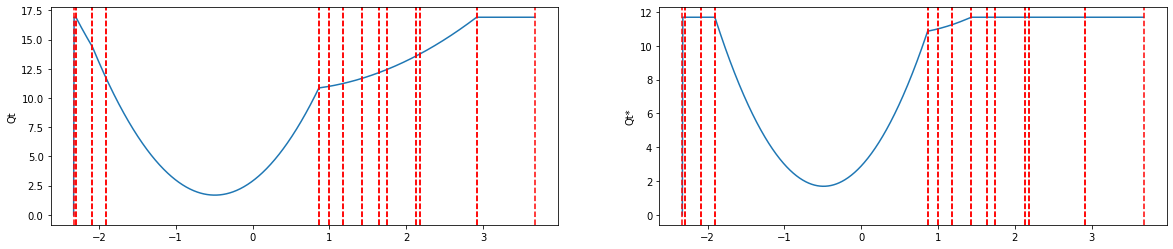

 21%|██        | 5/24 [00:01<00:04,  4.02it/s]

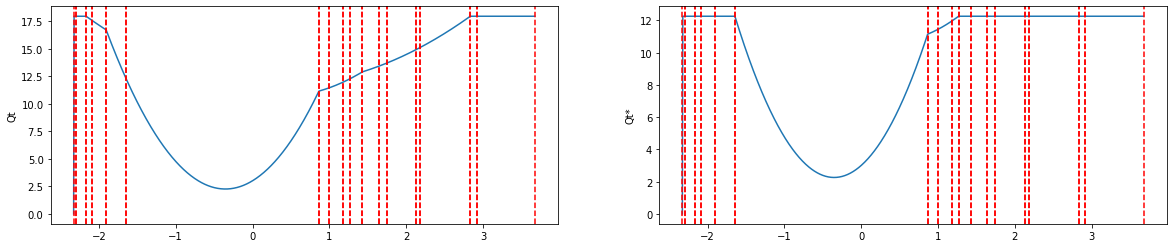

 25%|██▌       | 6/24 [00:01<00:04,  4.01it/s]

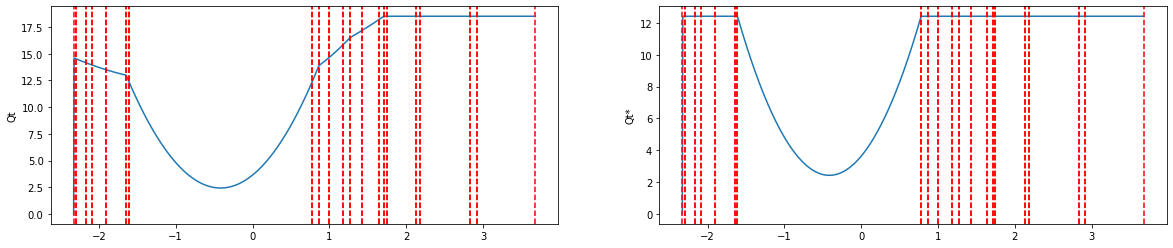

 29%|██▉       | 7/24 [00:01<00:04,  4.01it/s]

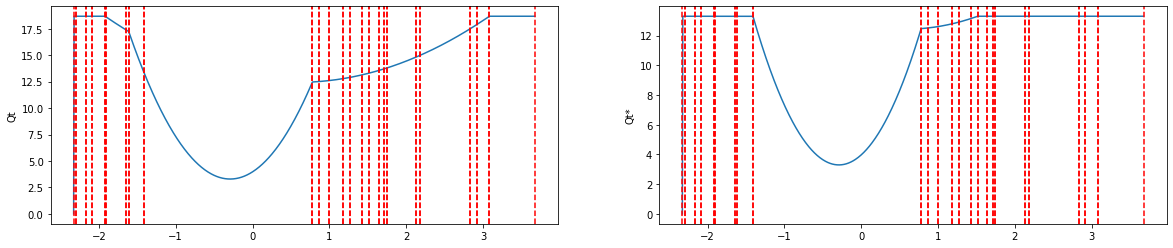

 33%|███▎      | 8/24 [00:01<00:04,  3.90it/s]

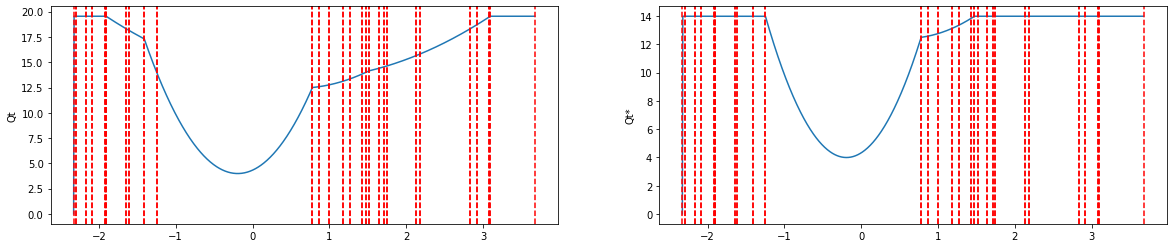

 38%|███▊      | 9/24 [00:02<00:04,  3.30it/s]

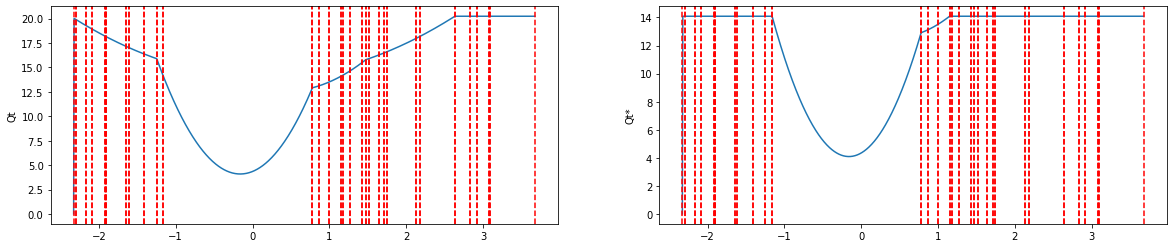

 42%|████▏     | 10/24 [00:02<00:04,  3.33it/s]

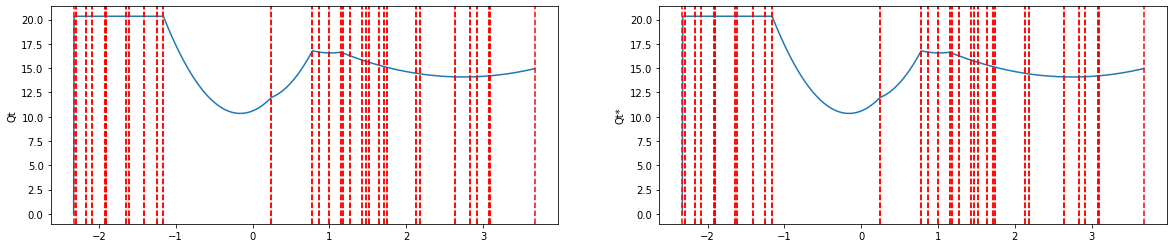

 46%|████▌     | 11/24 [00:02<00:03,  3.37it/s]

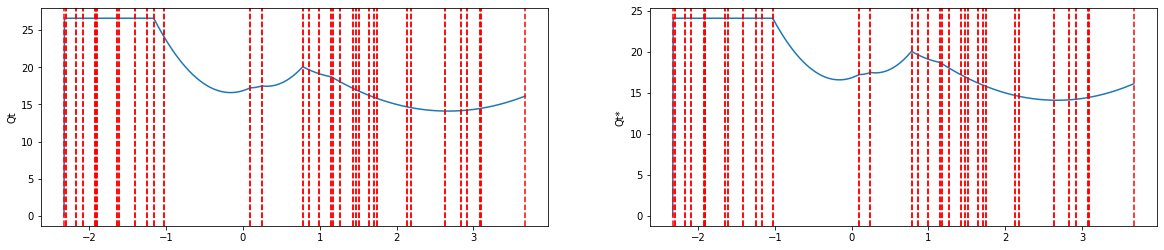

 50%|█████     | 12/24 [00:03<00:03,  3.29it/s]

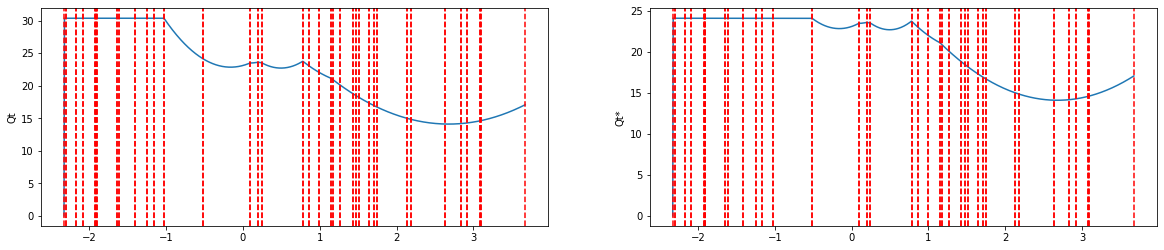

 54%|█████▍    | 13/24 [00:03<00:03,  2.92it/s]

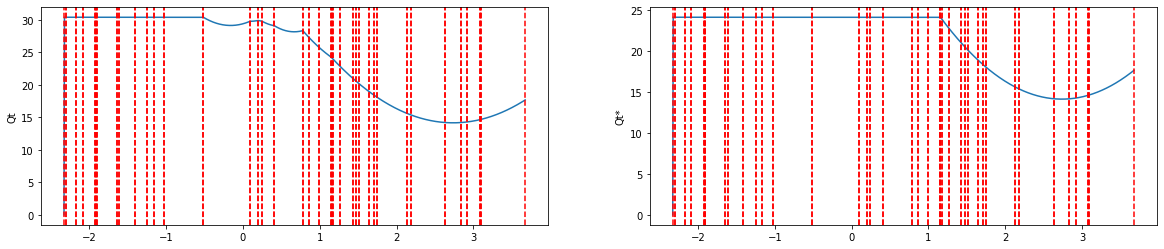

 58%|█████▊    | 14/24 [00:04<00:03,  3.04it/s]

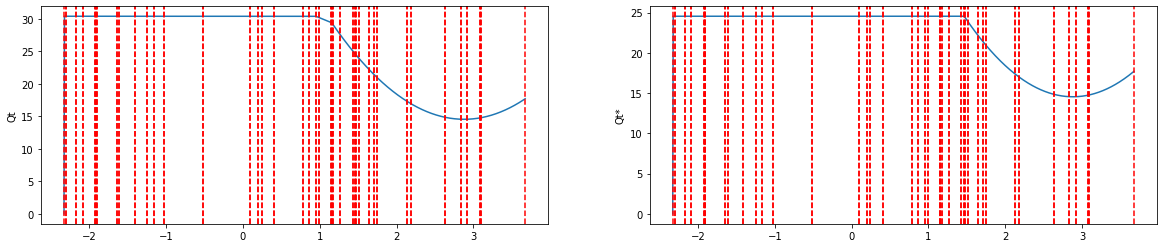

 62%|██████▎   | 15/24 [00:04<00:02,  3.08it/s]

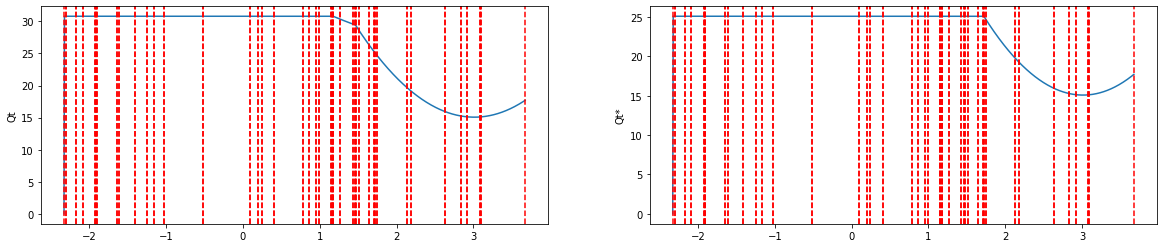

 67%|██████▋   | 16/24 [00:04<00:02,  3.17it/s]

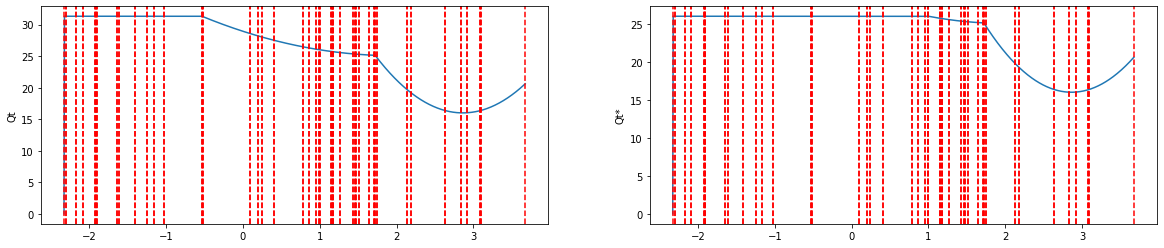

 71%|███████   | 17/24 [00:05<00:02,  2.94it/s]

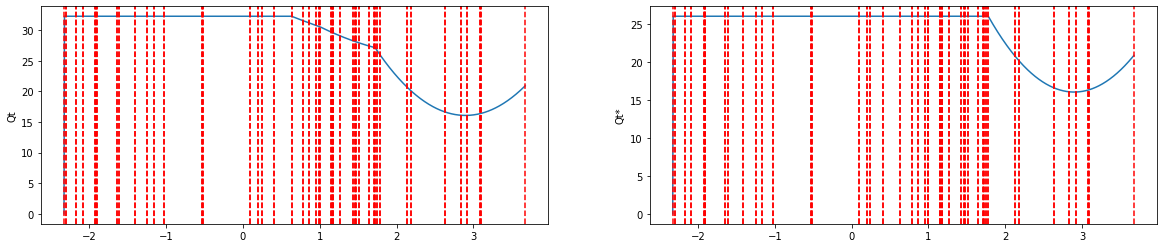

 75%|███████▌  | 18/24 [00:05<00:01,  3.04it/s]

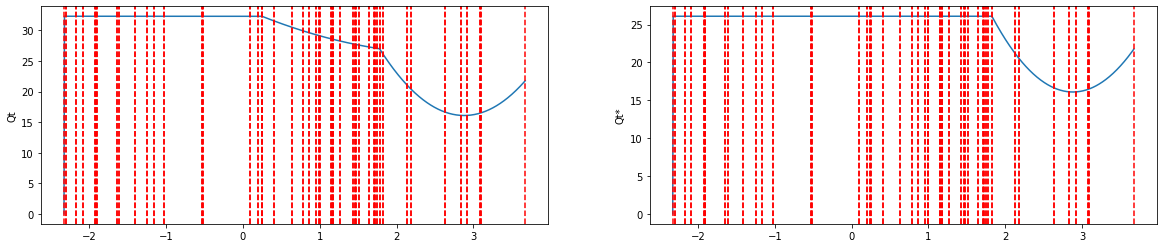

 79%|███████▉  | 19/24 [00:05<00:01,  2.92it/s]

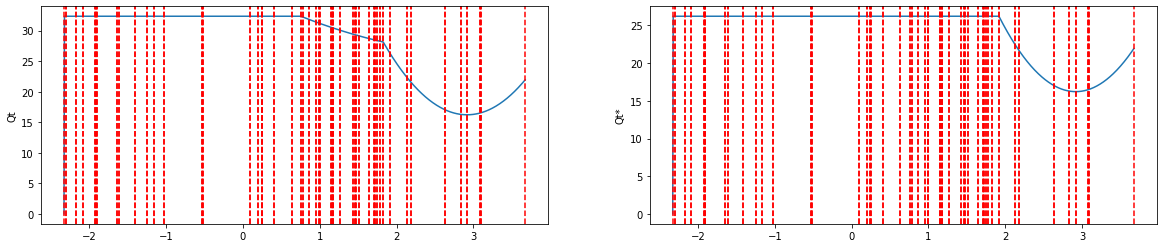

 83%|████████▎ | 20/24 [00:06<00:01,  2.90it/s]

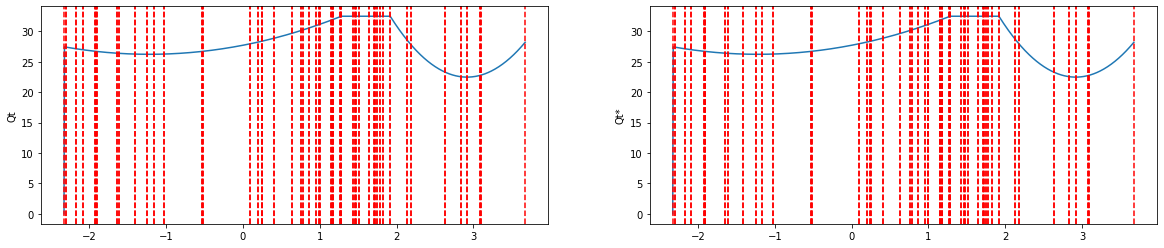

 88%|████████▊ | 21/24 [00:06<00:01,  2.55it/s]

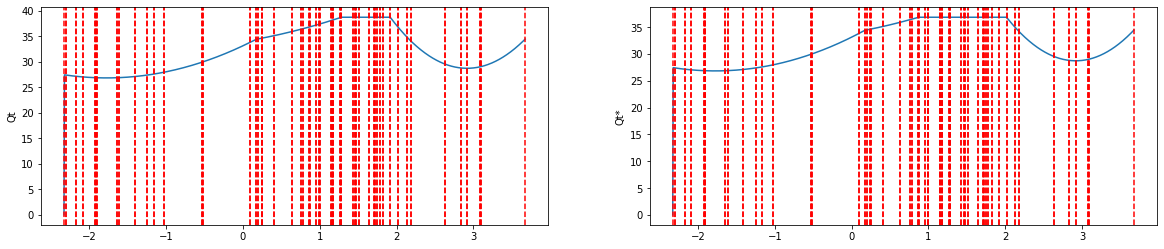

 92%|█████████▏| 22/24 [00:07<00:00,  2.45it/s]

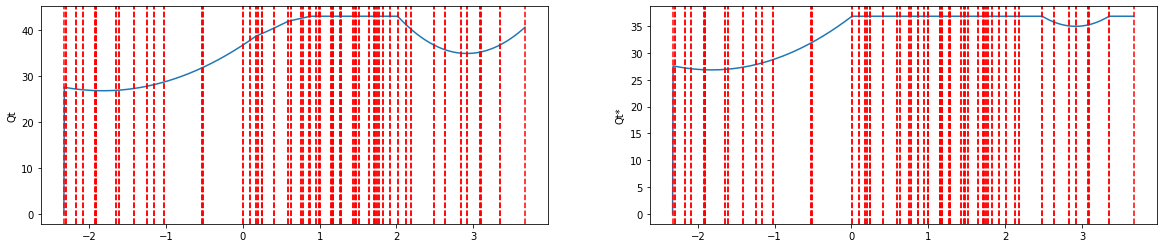

 96%|█████████▌| 23/24 [00:07<00:00,  2.54it/s]

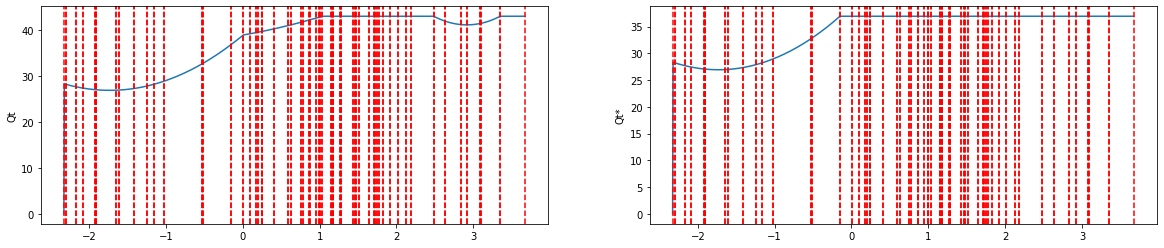

100%|██████████| 24/24 [00:07<00:00,  3.06it/s]


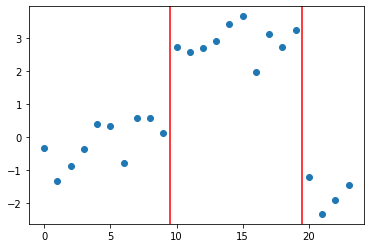

In [3]:
y1 = np.zeros(10)
y2 = 3+np.zeros(10)
y3 = -2+np.zeros(4)
y = np.concatenate((y1, y2, y3))
y += np.random.normal(0, 0.5, len(y))
cp = rfpop(y, 2.5, 10, verbose=True)
taus = [elt[1] for elt in cp]

plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

100%|██████████| 170/170 [00:02<00:00, 59.65it/s]


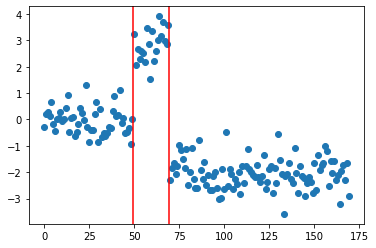

In [6]:
y1 = np.zeros(50)
y2 = 3+np.zeros(20)
y3 = -2+np.zeros(100)
y = np.concatenate((y1, y2, y3))
y += np.random.normal(0, 0.5, len(y))
cp = rfpop(y, 2.5, 10)
taus = [elt[1] for elt in cp]

plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

100%|██████████| 450/450 [00:37<00:00, 12.14it/s]


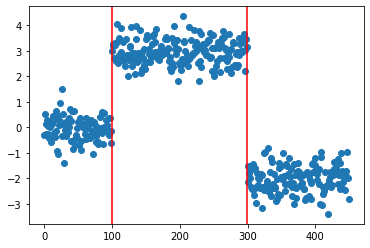

In [5]:
y1 = np.zeros(100)
y2 = 3+np.zeros(200)
y3 = -2+np.zeros(150)
y = np.concatenate((y1, y2, y3))
y += np.random.normal(0, 0.5, len(y))
cp = rfpop(y, 2.5, 10)
taus = [elt[1] for elt in cp]

plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()